In [0]:
%sh
pip install transformers==2.11.0 --user

Requirement already satisfied: transformers==2.11.0 in /databricks/python3/lib/python3.8/site-packages (2.11.0)
Requirement already satisfied: sacremoses in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (0.0.46)
Requirement already satisfied: sentencepiece in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (0.1.96)
Requirement already satisfied: tqdm>=4.27 in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (4.59.0)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (1.19.2)
Requirement already satisfied: regex!=2019.12.17 in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (2021.4.4)
Requirement already satisfied: filelock in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (3.0.12)
Requirement already satisfied: requests in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (2.25.1)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (20.9)
Requirement already satisfied: tokenizers==0.7.0 in /databricks/python3/lib/python3.8/site-packages (from transformers==2.11.0) (0.7.0)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging->transformers==2.11.0) (2.4.7)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==2.11.0) (2020.12.5)
Requirement already satisfied: chardet<5,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==2.11.0) (4.0.0)
Requirement already satisfied: urllib3<1.27,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==2.11.0) (1.25.11)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests->transformers==2.11.0) (2.10)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from sacremoses->transformers==2.11.0) (1.15.0)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.8/site-packages (from sacremoses->transformers==2.11.0) (1.0.1)
Requirement already satisfied: click in /databricks/python3/lib/python3.8/site-packages (from sacremoses->transformers==2.11.0) (7.1.2)
WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command.

In [0]:
dbutils.library.restartPython()

In [0]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
pd.options.mode.chained_assignment = None

In [0]:
data = pd.read_csv("/dbfs/FileStore/amazon_reviews_us_Mobile_Electronics_v1_00.csv", low_memory=False)
data.head()

Out[2]:

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,217304173,BlackVue DR600GW-PMP,Mobile_Electronics,5.0,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,137313254,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5.0,0.0,1.0,N,Y,five star,it's great,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5.0,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,221169481,abcGoodefgÂ® FBI Covert Acoustic Tube Earpiece...,Mobile_Electronics,4.0,0.0,0.0,N,Y,Work very well but couldn't get used to not he...,Work very well but couldn't get used to not he...,31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2.0,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",31/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = data[['review_body','star_rating']]
df.dropna(inplace=True)
df['star_rating'] = df['star_rating'].astype(int)

In [0]:
### Over sampling to balance Dataset

In [0]:
df['star_rating'].value_counts()

Out[4]: 5 52198
4 18063
1 17572
3 9720
2 7298
Name: star_rating, dtype: int64

In [0]:
possible_labels = df.star_rating.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

Out[5]: {5: 0, 4: 1, 2: 2, 3: 3, 1: 4}

In [0]:
df['label'] = df.star_rating.replace(label_dict)

In [0]:
df.head()

Out[9]:

,review_body,star_rating,label
0,"As advertised. Everything works perfectly, I'm...",5,0
1,it's great,5,0
2,These work great and fit my life proof case fo...,5,0
3,Work very well but couldn't get used to not he...,4,1
4,"Be careful with these products, I have bought ...",2,2


In [0]:
df.label.value_counts()

Out[10]: 0 52198
1 18063
4 17572
3 9720
2 7298
Name: label, dtype: int64

In [0]:
# separate data by labels
onestar = df[df.label==0]
twostar = df[df.label==1]
threestar = df[df.label==2]
fourstar = df[df.label==3]
fivestar = df[df.label==4]

# upsample minority labels
fivestar_upsampled = resample(fivestar, replace=True, n_samples=len(onestar), random_state=42)
twostar_upsampled = resample(twostar, replace=True, n_samples=len(onestar), random_state=42)
threestar_upsampled = resample(threestar, replace=True, n_samples=len(onestar), random_state=42)
fourstar_upsampled = resample(fourstar, replace=True, n_samples=len(onestar), random_state=42)

# combine sets back together
data_sampled = pd.concat([onestar, twostar_upsampled, threestar_upsampled, fourstar_upsampled, fivestar_upsampled])
# check data is now balanced
data_sampled.label.value_counts()

Out[11]: 0 52198
1 52198
2 52198
3 52198
4 52198
Name: label, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data_sampled.index.values, 
                                                  data_sampled.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=data_sampled.label.values)

In [0]:
pd.options.mode.chained_assignment = None
data_sampled['data_type'] = ['not_set']*data_sampled.shape[0]

data_sampled.loc[X_train, 'data_type'] = 'train'
data_sampled.loc[X_val, 'data_type'] = 'val'

### Cleaning

In [0]:
data_sampled.groupby(['review_body', 'label', 'data_type']).count()

Out[14]:

,,,star_rating
review_body,label,data_type,
! Good !,1,train,5
"!!! DO NOT LISTEN TO PEOPLE SAYING IT DOES NOT WORK BECAUSE THEY JUST DO NOT KNOW HOW TO USE IT !!! YOU NEED SOME KNOWLEDGE ABOUT COMPUTER COM PORTS TO SET UP THIS INTERFACE AND THEN IT WORKS EXACTLY LIKE THE GENUINE VAG-COM 409.1 TOOL !!!<br /><br />VAG-COM known as VCDS later on is the most Powerful Diagnostic Tool for all VAG Cars (VW, Audi, SEAT and Skoda). VCDS gives you Real Dealer Level Access to every car from VAG Group. VCDS and VAG-COM Software are made by Ross-Tech. Ross-Tech accepts 3rd Party Interfaces for their older version of VAG-COM till 409.1 and for newer VCDS Lite Software. Everything what you nees is a license from Ross-Tech which costs $99. After software registration this cheap VAG-COM Compatible Interface will transform to the Professional Grade VAG Scan Tool.<br /><br /> Main VAG-COM 409.1 and VCDS Lite Functions: *Reading and clearing DTCs from EVERY Electronic Control Module (Engine, ABS Brakes, SRS Airbags, Power Steering, Transmission...);<br /> *Reading Freeze Frame Data;<br /> *Performing Adaptations or Short and Long Coding on EVERY Module Supporting those functions;<br /> *Viewing Measured Values;<br /> *Reading Mileage Stored by ECU (Engine Control Unit);<br /> *Resetting Service Reminder Indicator (SRI Reset Function).<br /><br /> Please remember that any VAG-COM Compatible Interface covers only older VAG Cars till and including 2004. There is NO 3rd Party Interfaces for new VCDS Software after VAG-COM 409.1 or VCDS Lite. To use newest VCDS Software supporting CAN Protocol you have to buy Genuine Tool from Official Ross-Tech Distributor.",0,train,1
!!!!! DO NOT BUY !!!!! This adapter stopped charging the phone 27 days after receiving it. It is very difficult to plug in & remove the sync data cable from my iphone. This charger is garbage. Getting a refund might not be possible since the defective item needs to be returned to Amazon within 30 days of purchase.,4,train,2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! !!!! !!! !!! 11!! 1!11 very nice i loved the product an trust me u will shop again lol,0,train,1
!!!!!!WARNNING!!!!!!!! Make sure to use a inline fuse or you will burn the amp up.,0,train,1
...,...,...,...
ðŸ‘,3,train,6
ðŸ‘ðŸ½,0,val,1
ðŸ‘ðŸ‘ great price,0,train,1


In [0]:
import copy
df = copy.deepcopy(data_sampled)

In [0]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [0]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re
contractions, contractions_re = _get_contractions(contraction_dict)
def replace_contractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)
# Usage
replace_contractions("this's a text with contraction")

Out[17]: 'this is a text with contraction'

In [0]:
# lower the text
df["review_body"] = df["review_body"].apply(lambda x: x.lower())

# Clean the text
df["review_body"] = df["review_body"].apply(lambda x: clean_text(x))

# Clean numbers
df["review_body"] = df["review_body"].apply(lambda x: clean_numbers(x))

# Clean Contractions
df["review_body"] = df["review_body"].apply(lambda x: replace_contractions(x))

In [0]:
df.head()

Out[19]:

,review_body,star_rating,label,data_type
0,"as advertised. everything works perfectly, i a...",5,0,train
1,it is great,5,0,train
2,these work great and fit my life proof case fo...,5,0,train
7,worked great for vacation,5,0,train
9,i love my recorder. bought it obviously becaus...,5,0,train


In [0]:
def length_review(x):
  return len(x.split())

df['length_text'] = df['review_body'].apply(length_review) # count number of tokens

In [0]:
df['length_text'].max(),df['length_text'].min(), df['length_text'].mean()

Out[22]: (2718, 1, 69.91362887466953)

In [0]:
df['length_text'].describe()

Out[23]: count 260990.000000
mean 69.913629
std 98.855327
min 1.000000
25% 23.000000
50% 41.000000
75% 80.000000
max 2718.000000
Name: length_text, dtype: float64

Out[24]:

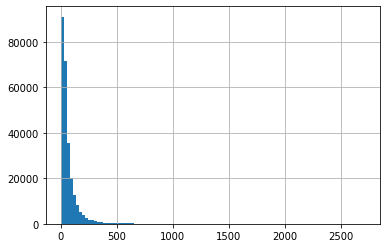

<AxesSubplot:>

In [0]:
df['length_text'].hist(bins=100)

Out[25]:

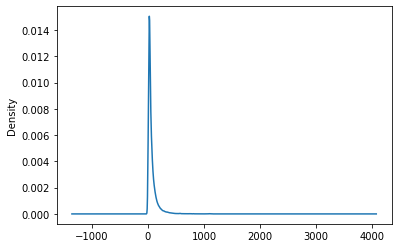

<AxesSubplot:ylabel='Density'>

In [0]:
df['length_text'].plot.kde()

In [0]:
df.drop("length_text",inplace = True, axis=1)

In [0]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading: 0%| | 0.00/232k [00:00<?, ?B/s]

In [0]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].review_body.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
  truncation=True,
    pad_to_max_length=True, 
    max_length=128, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].review_body.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
  truncation=True,
    pad_to_max_length=True, 
    max_length=128, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

In [0]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [0]:
len(dataset_train), len(dataset_val)

Out[30]: (136934, 124056)

In [0]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Downloading: 0%| | 0.00/433 [00:00<?, ?B/s]
Downloading: 0%| | 0.00/440M [00:00<?, ?B/s]

In [0]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

In [0]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [0]:
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [0]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [0]:
import random
import numpy as np
import mlflow
import mlflow.sklearn
import mlflow.pyfunc
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda

In [0]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [0]:
dbutils.fs.mkdirs("/mnt/nlp/data_volume")

Out[39]: True

In [0]:
import datetime
# perform evaluation CHURNED_BEFORE_365_DAYS
experiment_name="NLP_text_classification"
user_name= "juan.romero@sage.com"
experiment_folder = 'experiments'
experimentName = f"/Users/{user_name}/{experiment_folder}/{experiment_name}" 
mlflow.set_experiment(experimentName)

time1=datetime.datetime.now().strftime(format="%Y%m%d_%H%M")
with mlflow.start_run(run_name='bert_uncased_model'):
  run_id = mlflow.active_run().info.run_id
  print(f"run_id : {run_id}")


  for epoch in tqdm(range(1, epochs+1)):

      model.train()

      loss_train_total = 0

      progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
      for batch in progress_bar:

          model.zero_grad()

          batch = tuple(b.to(device) for b in batch)

          inputs = {'input_ids':      batch[0],
                    'attention_mask': batch[1],
                    'labels':         batch[2],
                   }       

          outputs = model(**inputs)

          loss = outputs[0]
          loss_train_total += loss.item()
          loss.backward()

          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

          optimizer.step()
          scheduler.step()

          progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


      torch.save(model.state_dict(), f'/dbfs/mnt/nlp/data_volume/finetuned_BERT_epoch_{epoch}.model')#nlp/data_volume/test
      tqdm.write(f'\nEpoch {epoch}')

      loss_train_avg = loss_train_total/len(dataloader_train)            
      tqdm.write(f'Training loss: {loss_train_avg}')

      val_loss, predictions, true_vals = evaluate(dataloader_validation)
      val_f1 = f1_score_func(predictions, true_vals)
      
      mlflow.log_metric('Training_loss', loss_train_avg)
      mlflow.log_metric('Validation_loss', val_loss)
      mlflow.log_metric('F1_Score', val_f1)
      
      tqdm.write(f'Validation loss: {val_loss}')
      tqdm.write(f'F1 Score (Weighted): {val_f1}')

run_id : d9e08314af7a4c8db0523417d6042f5e
 0%| | 0/5 [00:00<?, ?it/s]
Epoch 1: 0%| | 0/45645 [00:00<?, ?it/s]

Epoch 1
Training loss: 0.8522240875734102
Validation loss: 2.450142635711627
F1 Score (Weighted): 0.456353885261805
Epoch 2: 0%| | 0/45645 [00:00<?, ?it/s]

Epoch 2
Training loss: 0.6060447933197582
Validation loss: 3.3222155738378505
F1 Score (Weighted): 0.48169686439250975
Epoch 3: 0%| | 0/45645 [00:00<?, ?it/s]

Epoch 3
Training loss: 0.37155929723028214
Validation loss: 4.379704543146296
F1 Score (Weighted): 0.4430807996182012
Epoch 4: 0%| | 0/45645 [00:00<?, ?it/s]

Epoch 4
Training loss: 0.21722204369052106
Validation loss: 4.776581607412095
F1 Score (Weighted): 0.4406453196613581
Epoch 5: 0%| | 0/45645 [00:00<?, ?it/s]

Epoch 5
Training loss: 0.12822099655517655
Validation loss: 5.240043703296183
F1 Score (Weighted): 0.4239595606973962

In [0]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Out[41]: BertForSequenceClassification(
 (bert): BertModel(
 (embeddings): BertEmbeddings(
 (word_embeddings): Embedding(30522, 768, padding_idx=0)
 (position_embeddings): Embedding(512, 768)
 (token_type_embeddings): Embedding(2, 768)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 (encoder): BertEncoder(
 (layer): ModuleList(
 (0): BertLayer(
 (attention): BertAttention(
 (self): BertSelfAttention(
 (query): Linear(in_features=768, out_features=768, bias=True)
 (key): Linear(in_features=768, out_features=768, bias=True)
 (value): Linear(in_features=768, out_features=768, bias=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 (output): BertSelfOutput(
 (dense): Linear(in_features=768, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (intermediate): BertIntermediate(
 (dense): Linear(in_features=768, out_features=3072, bias=True)
 )
 (output): BertOutput(
 (dense): Linear(in_features=3072, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (1): BertLayer(
 (attention): BertAttention(
 (self): BertSelfAttention(
 (query): Linear(in_features=768, out_features=768, bias=True)
 (key): Linear(in_features=768, out_features=768, bias=True)
 (value): Linear(in_features=768, out_features=768, bias=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 (output): BertSelfOutput(
 (dense): Linear(in_features=768, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (intermediate): BertIntermediate(
 (dense): Linear(in_features=768, out_features=3072, bias=True)
 )
 (output): BertOutput(
 (dense): Linear(in_features=3072, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (2): BertLayer(
 (attention): BertAttention(
 (self): BertSelfAttention(
 (query): Linear(in_features=768, out_features=768, bias=True)
 (key): Linear(in_features=768, out_features=768, bias=True)
 (value): Linear(in_features=768, out_features=768, bias=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 (output): BertSelfOutput(
 (dense): Linear(in_features=768, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (intermediate): BertIntermediate(
 (dense): Linear(in_features=768, out_features=3072, bias=True)
 )
 (output): BertOutput(
 (dense): Linear(in_features=3072, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (3): BertLayer(
 (attention): BertAttention(
 (self): BertSelfAttention(
 (query): Linear(in_features=768, out_features=768, bias=True)
 (key): Linear(in_features=768, out_features=768, bias=True)
 (value): Linear(in_features=768, out_features=768, bias=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 (output): BertSelfOutput(
 (dense): Linear(in_features=768, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (intermediate): BertIntermediate(
 (dense): Linear(in_features=768, out_features=3072, bias=True)
 )
 (output): BertOutput(
 (dense): Linear(in_features=3072, out_features=768, bias=True)
 (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 )
 (4): BertLayer(
 (attention): BertAttention(
 (self): BertSelfAttention(
 (query): Linear(in_features=768, out_features=768, bias=True)
 (key): Linear(in_features=768, out_features=768, bias=True)
 (value): Linear(in_features=768, out_features=768, bias=True)
 (dropout): Dropout(p=0.1, inplace=False)
 )
 (output): BertSelfOutput(
 (d

In [0]:
model.load_state_dict(torch.load('/dbfs/mnt/nlp/data_volume/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

Out[42]: <All keys matched successfully>

In [0]:
_, predictions, true_vals = evaluate(dataloader_validation)

In [0]:
accuracy_per_class(predictions, true_vals)

Class: 5
Accuracy: 6605/7830

Class: 4
Accuracy: 9880/23235

Class: 2
Accuracy: 8638/37029

Class: 3
Accuracy: 14383/32315

Class: 1
Accuracy: 19802/23647